In [35]:
from langgraph.graph import StateGraph,START ,END
from typing import TypedDict

In [36]:
# define the state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [37]:
def cal_bmi(state: BMIState) -> BMIState:
    """Calculate BMI from weight and height."""
    weight = state["weight_kg"]
    height = state["height_m"]
    bmi = weight / (height ** 2)
    state["bmi"] = bmi
    return state


def cat(state: BMIState) -> BMIState:
    """Determine the BMI category."""
    bmi = state["bmi"]
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 24.9:
        state["category"] = "Normal weight"
    elif 25 <= bmi < 29.9:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obesity"
    return state

In [47]:
# define the graph
graph = StateGraph(BMIState)


# add nodes
graph.add_node("claculate_bmi",cal_bmi)
graph.add_node("catogory", cat)

# add edges
graph.add_edge(START, "claculate_bmi")
graph.add_edge("claculate_bmi", "catogory")
graph.add_edge("catogory", END)

# compile the graph
workflow = graph.compile()




In [50]:
# exicute the workflow
initial_state = {    "weight_kg": 7,
                    "height_m": 15,}
output  =  workflow.invoke(initial_state)

In [51]:
output

{'weight_kg': 7,
 'height_m': 15,
 'bmi': 0.03111111111111111,
 'category': 'Underweight'}

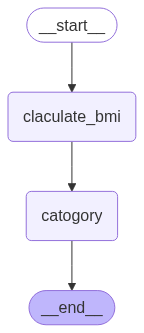

In [52]:
from IPython.display import Image 
Image(workflow.get_graph().draw_mermaid_png())